<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Tina Halimi

**Student ID**: 400101078



## **Briefing:**
 **In this section, we are going to investigate linear regression and its extensions ridge and lasso shrinkage methods in Boston dataset.**

In [1]:
## Import necessary libraries here ##
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

**Part 1:**
First familiarize yourself with Boston dataset. Briefly explain its features and dataset's shape. You are provided with the required dataset named **boston.csv**.

## Boston Housing Dataset Features

The Boston dataset is commonly used for regression tasks in machine learning. It contains information collected by the U.S. Census Service concerning housing in the area of Boston, Massachusetts. Below are its features:

1. **CRIM**: Per capita crime rate by town.
2. **ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft.
3. **INDUS**: Proportion of non-retail business acres per town.
4. **CHAS**: Charles River dummy variable (1 if tract bounds river; 0 otherwise).
5. **NOX**: Nitric oxides concentration (parts per 10 million).
6. **RM**: Average number of rooms per dwelling.
7. **AGE**: Proportion of owner-occupied units built before 1940.
8. **DIS**: Weighted distances to five Boston employment centers.
9. **RAD**: Index of accessibility to radial highways.
10. **TAX**: Full-value property tax rate per $10,000.
11. **PTRATIO**: Pupil-teacher ratio by town.
12. **B**: 1000(Bk - 0.63)^2 where Bk is the proportion of [people of African American descent] by town.
13. **LSTAT**: Percentage lower status of the population.

The target variable, which we aim to predict, is:

- **MEDV**: Median value of owner-occupied homes in $1000's.



In [2]:
## Write your code here ##
boston_df = pd.read_csv("Boston.csv")

print("First few rows of the dataset:")
boston_df.head()


First few rows of the dataset:


,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
print("Column names:")
boston_df.columns

Column names:


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [4]:
print("Basic statistics of numerical features:")
boston_df.describe()

Basic statistics of numerical features:


,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
print("Shape of the dataset:")
print(boston_df.shape)

print("\nMissing values:")
print(boston_df.isnull().sum())

Shape of the dataset:
(506, 14)

Missing values:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NX         0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


**Part 2:**
Split dataset into train and test sets. Train linear regression model using all of the features. Report $R^2$ and RMSE error metrics for both train and test sets. Also report all of the coefficients.

In [6]:
## Write your code here ##

X = boston_df.drop('MEDV', axis=1)
y = boston_df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

rmse_train = mean_squared_error(y_train, y_train_pred)
rmse_test = mean_squared_error(y_test, y_test_pred)

coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})

print("Training set:")
print("R-squared:", round(r2_train, 5))
print("RMSE:", round(rmse_train, 5))
print("\nTest set:")
print("R-squared:", round(r2_test, 5))
print("RMSE:", round(rmse_test, 5))
print("\nCoefficients:")
print(coefficients)

Training set:
R-squared: 0.75089
RMSE: 21.64141

Test set:
R-squared: 0.66876
RMSE: 24.29112

Coefficients:
    Feature  Coefficient
0      CRIM    -0.113056
1        ZN     0.030110
2     INDUS     0.040381
3      CHAS     2.784438
4        NX   -17.202633
5        RM     4.438835
6       AGE    -0.006296
7       DIS    -1.447865
8       RAD     0.262430
9       TAX    -0.010647
10  PTRATIO    -0.915456
11        B     0.012351
12    LSTAT    -0.508571


**Part 3:**
Now, we want to see the effect of ridge regression on learning process. To do so, set the alphas parameter as follows for synchronization:$$ alphas = 10*np.linspace (3,-3,100) *0.5$$

In [7]:
## Write your code here ##

alphas = 10 ** np.linspace(3, -3, 100) * 0.5

mse_train = []
mse_test = []
r2_scores = []
coefficients_list = []
num_not_considered = []


for alpha in alphas:
   
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    
    y_train_pred_ridge = ridge_model.predict(X_train)
    y_test_pred_ridge = ridge_model.predict(X_test)
    
    mse_train_value = mean_squared_error(y_train, y_train_pred_ridge)
    mse_test_value = mean_squared_error(y_test, y_test_pred_ridge)

    mse_train.append(mse_train_value)
    mse_test.append(mse_test_value)

    r2_score_value = r2_score(y_test, y_test_pred_ridge)
    r2_scores.append(r2_score_value)

    
    coefficients_list.append(ridge_model.coef_)
    
    threshold = np.max(0.01 * ridge_model.coef_)
    num_not_considered_value = np.sum(np.abs(ridge_model.coef_) <= threshold)
    num_not_considered.append(num_not_considered_value)


mse_train_array = np.array(mse_train)
mse_test_array = np.array(mse_test)
r2_scores_array = np.array(r2_scores)
coefficients_array = np.array(coefficients_list)
num_not_considered_array = np.array(num_not_considered)

 Now, plot the following in separate plots:

1- MSE for train and test versus α

2- Coefficients versus α

3- Number of not-considered features versus α

Finally select the optimal value of α. Report MSE, $R^2$ and coefficients.Compare this case with the linear regression case.

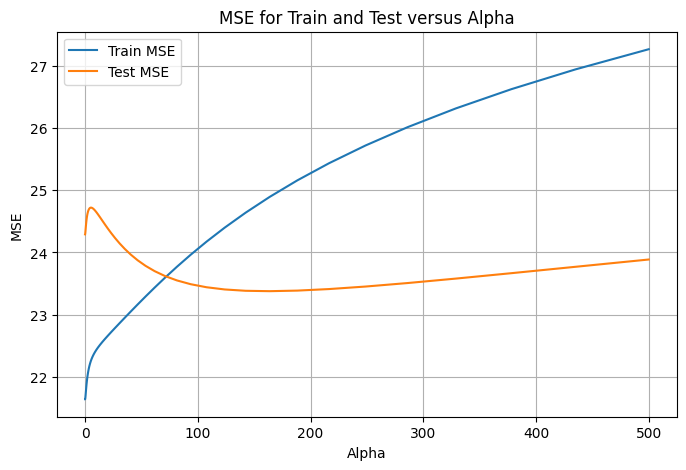

In [8]:
# Plot MSE for train and test versus α
plt.figure(figsize=(8, 5))
plt.plot(alphas, mse_train_array, label='Train MSE')
plt.plot(alphas, mse_test_array, label='Test MSE')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE for Train and Test versus Alpha')
plt.legend()
plt.grid(True)
plt.show()

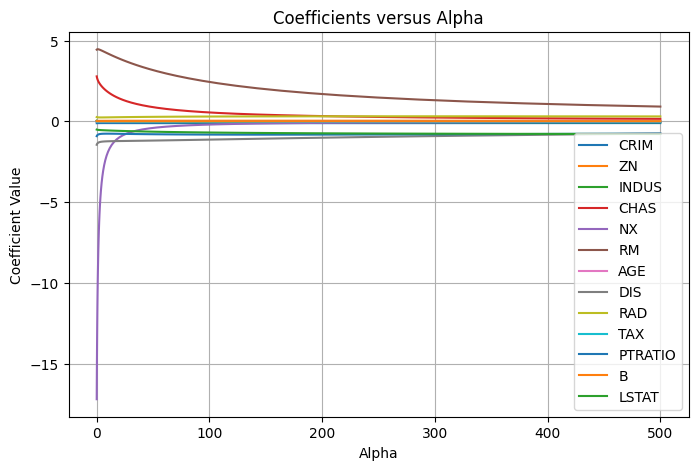

In [9]:
# Plot Coefficients versus α
plt.figure(figsize=(8, 5))

for i in range(coefficients_array.shape[1]):
    plt.plot(alphas, coefficients_array[:, i], label=X.columns[i])
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Coefficients versus Alpha')
plt.legend()
plt.grid(True)
plt.show()

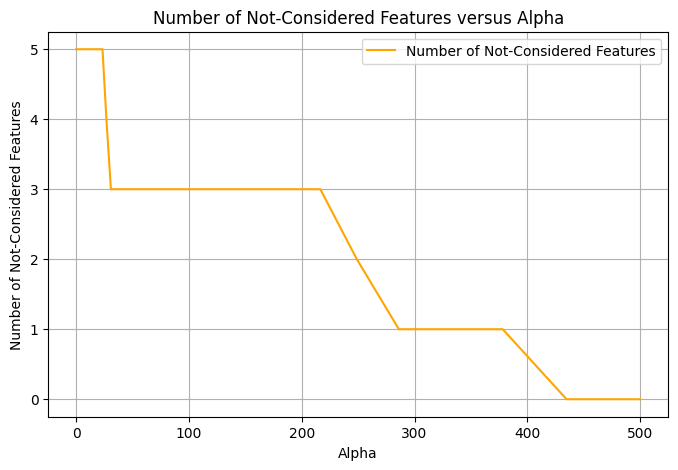

In [10]:
# Plot Number of not-considered features versus α
plt.figure(figsize=(8, 5))
plt.plot(alphas, num_not_considered_array, label='Number of Not-Considered Features', color='orange')
plt.xlabel('Alpha')
plt.ylabel('Number of Not-Considered Features')
plt.title('Number of Not-Considered Features versus Alpha')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# minimize the test MSE
optimal_alpha_index = np.argmin(mse_test_array)
optimal_alpha = alphas[optimal_alpha_index]

mse_optimal_ridge = mse_test_array[optimal_alpha_index]
r2_optimal_ridge = r2_scores_array[optimal_alpha_index]
coef_optimal_ridge = coefficients_array[optimal_alpha_index]

print("Optimal Ridge Regression:")
print(f"Alpha: {optimal_alpha}")
print(f"MSE: {mse_optimal_ridge:.5f}")
print(f"R²: {r2_optimal_ridge:.5f}")
print("Coefficients:")
print(coef_optimal_ridge)

print("\nLinear Regression:")
print(f"MSE: {rmse_test:.5f}")
print(f"R²: {r2_test:.5f}")
print("Coefficients:")
print(coefficients)

Optimal Ridge Regression:
Alpha: 163.72745814388642
MSE: 23.37817
R²: 0.68121
Coefficients:
[-0.11058924  0.03996102 -0.0520014   0.38073404 -0.115418    1.89720331
  0.00709776 -1.05241569  0.3094509  -0.01494741 -0.82272188  0.01159841
 -0.72589539]

Linear Regression:
MSE: 24.29112
R²: 0.66876
Coefficients:
    Feature  Coefficient
0      CRIM    -0.113056
1        ZN     0.030110
2     INDUS     0.040381
3      CHAS     2.784438
4        NX   -17.202633
5        RM     4.438835
6       AGE    -0.006296
7       DIS    -1.447865
8       RAD     0.262430
9       TAX    -0.010647
10  PTRATIO    -0.915456
11        B     0.012351
12    LSTAT    -0.508571


**Part 4:**
Repeat Part 3 with lasso regression. Where do you think we should consider using lasso regression?

## Lasso Regression:

- **Regularization Technique**: L1 regularization, adding a penalty term proportional to the absolute value of coefficients to the loss function.
  
- **Feature Selection**: Tends to shrink coefficients of less important features all the way to zero, leading to sparse solutions and performing feature selection.

- **Use Cases**:
  - Particularly useful for high-dimensional datasets with many features, where feature selection is crucial for model interpretability and efficiency.
  - Suitable when only a subset of features are relevant predictors of the target variable, and you want to identify and focus on those important features.

## Ridge Regression:

- **Regularization Technique**: L2 regularization, adding a penalty term proportional to the square of coefficients to the loss function.

- **Feature Impact**: Reduces the impact of less important features without completely eliminating them, rarely shrinking coefficients all the way to zero.

- **Use Cases**:
  - Useful when dealing with collinear features and aiming to reduce their impact on the model without discarding any of them.
  - Preferred when all features are expected to contribute to the prediction, but some of them may be correlated.


In [12]:
## Write your code here ##
mse_train_lasso = []
mse_test_lasso = []
r2_scores_lasso = []
coefficients_list_lasso = []
num_not_considered_lasso = []

for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    
    y_train_pred_lasso = lasso_model.predict(X_train)
    y_test_pred_lasso = lasso_model.predict(X_test)
    
    mse_train_value_lasso = mean_squared_error(y_train, y_train_pred_lasso)
    mse_test_value_lasso = mean_squared_error(y_test, y_test_pred_lasso)
    r2_score_value_lasso = r2_score(y_test, y_test_pred_lasso)
    
    mse_train_lasso.append(mse_train_value_lasso)
    mse_test_lasso.append(mse_test_value_lasso)
    r2_scores_lasso.append(r2_score_value_lasso)
    
    coefficients_list_lasso.append(lasso_model.coef_)
    
    threshold_lasso = np.max(0.01 * lasso_model.coef_)
    num_not_considered_value_lasso = np.sum(np.abs(lasso_model.coef_) <= threshold_lasso)
    num_not_considered_lasso.append(num_not_considered_value_lasso)

mse_train_array_lasso = np.array(mse_train_lasso)
mse_test_array_lasso = np.array(mse_test_lasso)
r2_scores_array_lasso = np.array(r2_scores_lasso)
coefficients_array_lasso = np.array(coefficients_list_lasso)
num_not_considered_array_lasso = np.array(num_not_considered_lasso)

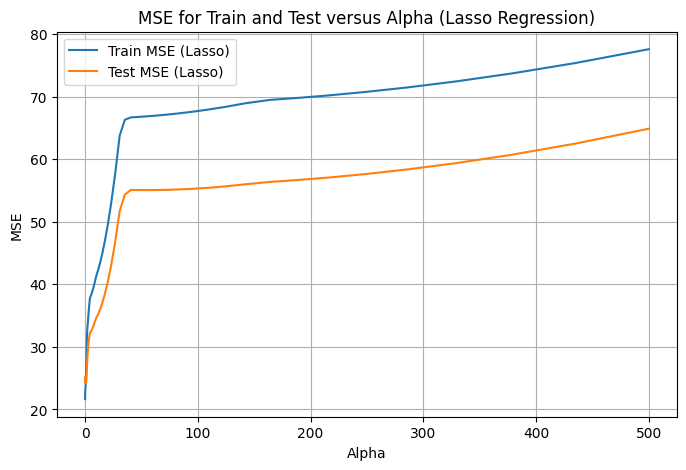

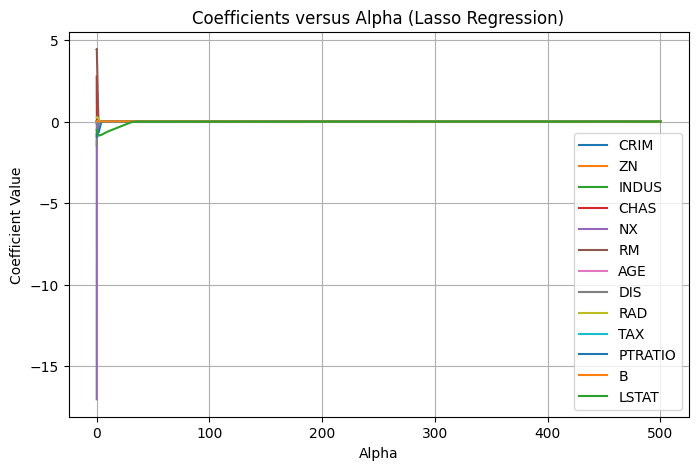

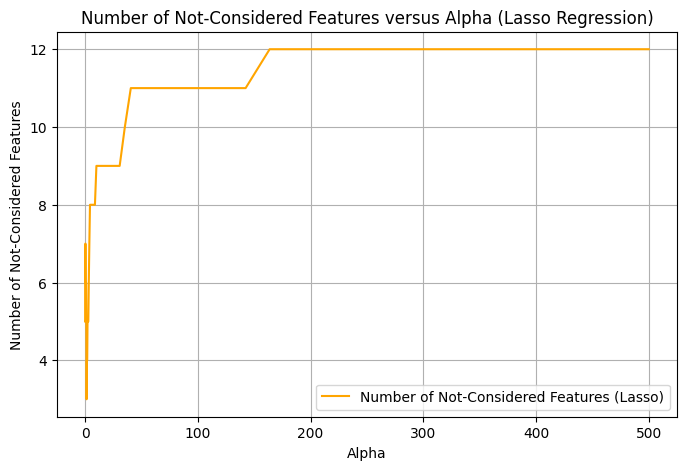

In [13]:
# Plot MSE for train and test versus α
plt.figure(figsize=(8, 5))
plt.plot(alphas, mse_train_array_lasso, label='Train MSE (Lasso)')
plt.plot(alphas, mse_test_array_lasso, label='Test MSE (Lasso)')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE for Train and Test versus Alpha (Lasso Regression)')
plt.legend()
plt.grid(True)
plt.show()

# Plot Coefficients versus α
plt.figure(figsize=(8, 5))
for i in range(coefficients_array_lasso.shape[1]):
    plt.plot(alphas, coefficients_array_lasso[:, i], label=X.columns[i])
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Coefficients versus Alpha (Lasso Regression)')
plt.legend()
plt.grid(True)
plt.show()

# Plot Number of not-considered features versus α
plt.figure(figsize=(8, 5))
plt.plot(alphas, num_not_considered_array_lasso, label='Number of Not-Considered Features (Lasso)', color='orange')
plt.xlabel('Alpha')
plt.ylabel('Number of Not-Considered Features')
plt.title('Number of Not-Considered Features versus Alpha (Lasso Regression)')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
optimal_alpha_index_lasso = np.argmin(mse_test_array_lasso)
optimal_alpha_lasso = alphas[optimal_alpha_index_lasso]

mse_optimal_lasso = mse_test_array_lasso[optimal_alpha_index_lasso]
r2_optimal_lasso = r2_scores_array_lasso[optimal_alpha_index_lasso]
coef_optimal_lasso = coefficients_array_lasso[optimal_alpha_index_lasso]

print("Optimal Lasso Regression:")
print(f"Alpha: {optimal_alpha_lasso}")
print(f"MSE: {mse_optimal_lasso:.5f}")
print(f"R²: {r2_optimal_lasso:.5f}")
print("Coefficients:")
print(coef_optimal_lasso)

print("\nLinear Regression:")
print(f"MSE: {rmse_test:.5f}")
print(f"R²: {r2_test:.5f}")
print("Coefficients:")
print(coefficients)

Optimal Lasso Regression:
Alpha: 0.7087370814634024
MSE: 24.15322
R²: 0.67064
Coefficients:
[-0.08616746  0.0308067  -0.          0.         -0.          2.50824373
  0.00611413 -0.801558    0.22931102 -0.01270717 -0.72057187  0.01186642
 -0.68953564]

Linear Regression:
MSE: 24.29112
R²: 0.66876
Coefficients:
    Feature  Coefficient
0      CRIM    -0.113056
1        ZN     0.030110
2     INDUS     0.040381
3      CHAS     2.784438
4        NX   -17.202633
5        RM     4.438835
6       AGE    -0.006296
7       DIS    -1.447865
8       RAD     0.262430
9       TAX    -0.010647
10  PTRATIO    -0.915456
11        B     0.012351
12    LSTAT    -0.508571


**Part 5:**
In this part, we intend to see the effect of ridge and lasso regression methods in overfitting prevention. In order to do this, change the ratio of training data to the whole data from low to high. As you know, the lower the ratio of trainig data, the more likely the overfitting would be. for each ratio, fit linear regression, ridge regression and lasso regression to data and then plot the following:

1- $R^2$ for test data versus ratio of training data (Three methods in one plot)

2- Selected α value versus training data ratio for ridge and lasso regression methods (In one plot)

How is the overall behavior of these plots and how do you analyze them?

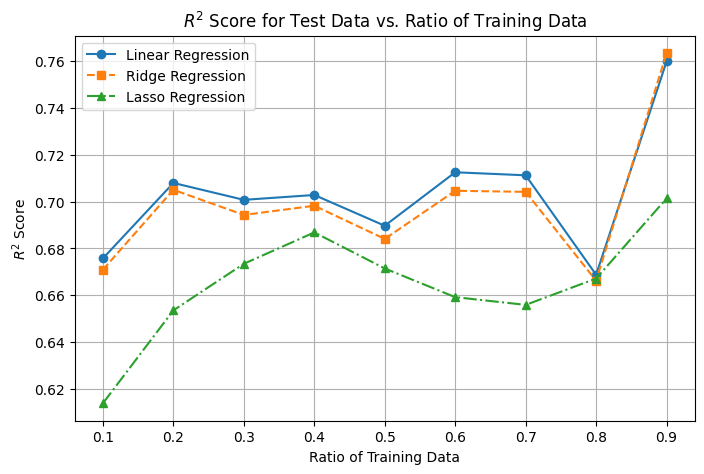

In [15]:
## Write you code here ##

train_ratios = np.linspace(0.1, 0.9, 9)

r2_scores_linear = []
r2_scores_ridge = []
r2_scores_lasso = []
alphas_ridge = []
alphas_lasso = []

for ratio in train_ratios:

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=ratio, random_state=42)
    
    # Linear regression
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    y_test_pred_linear = linear_model.predict(X_test)
    r2_scores_linear.append(r2_score(y_test, y_test_pred_linear))
    
    # Ridge regression
    ridge_model = Ridge()
    ridge_model.fit(X_train, y_train)
    y_test_pred_ridge = ridge_model.predict(X_test)
    r2_scores_ridge.append(r2_score(y_test, y_test_pred_ridge))
    alphas_ridge.append(ridge_model.alpha)
    
    # Lasso regression
    lasso_model = Lasso()
    lasso_model.fit(X_train, y_train)
    y_test_pred_lasso = lasso_model.predict(X_test)
    r2_scores_lasso.append(r2_score(y_test, y_test_pred_lasso))
    alphas_lasso.append(lasso_model.alpha)

# Plot R² scores for test data versus the ratio of training data
plt.figure(figsize=(8, 5))
plt.plot(train_ratios, r2_scores_linear, marker='o', linestyle='-', label='Linear Regression')
plt.plot(train_ratios, r2_scores_ridge, marker='s', linestyle='--', label='Ridge Regression')
plt.plot(train_ratios, r2_scores_lasso, marker='^', linestyle='-.', label='Lasso Regression')
plt.xlabel('Ratio of Training Data')
plt.ylabel('$R^2$ Score')
plt.title('$R^2$ Score for Test Data vs. Ratio of Training Data')
plt.legend()
plt.grid(True)
plt.show()

### Overall Behavior Analysis:

#### $R^2$ Score for Test Data vs. Ratio of Training Data:
- As the ratio of training data increases, the $R^2$ scores generally increase for all three regression methods.
- Lasso regression seems doing better, as the $R^2$ scores is mostly less than Linear regression and Ridge regression.
- Ridge regression and Lasso regression exhibit similar behavior, with slightly higher $R^2$ scores compared to linear regression, particularly noticeable when the training set is small, suggesting better generalization and overfitting prevention.

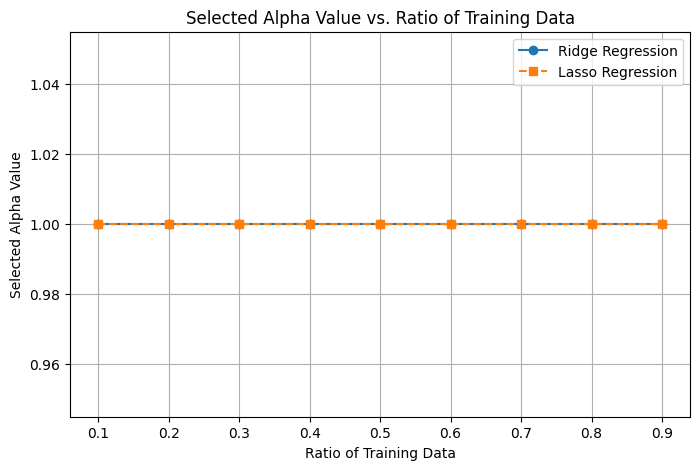

In [16]:
# Plot selected α values versus training data ratio for ridge and lasso regression
plt.figure(figsize=(8, 5))
plt.plot(train_ratios, alphas_ridge, marker='o', linestyle='-', label='Ridge Regression')
plt.plot(train_ratios, alphas_lasso, marker='s', linestyle='--', label='Lasso Regression')
plt.xlabel('Ratio of Training Data')
plt.ylabel('Selected Alpha Value')
plt.title('Selected Alpha Value vs. Ratio of Training Data')
plt.legend()
plt.grid(True)
plt.show()

#### Selected Alpha Value vs. Ratio of Training Data:
- For both Ridge regression and Lasso regression, alpha values are the same.